In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
url = 'https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data'

od.download(url)

Skipping, found downloaded files in "./79-dapt-ih-hotel-booking" (use force=True to force download)


In [4]:
df_train = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_traintest.csv')
df_test = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_feat_valid_2.csv')
df_sample = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_sample_valid.csv')

In [5]:
df_train.shape, df_test.shape, df_sample.shape

((113409, 29), (5981, 28), (5981, 2))

In [6]:
hotel_origin = pd.concat([df_train, df_test])

In [7]:
hotel_origin.shape

(119390, 29)

The dataset contains over 119390 rows and 29 columns

basic information about the data frame.

In [8]:
hotel_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 5980
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_cancelled                    113409 non-null  float64
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_guest 

In [9]:
hotel_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
is_cancelled,113409.0,0.370658,0.482983,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.00,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.00,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.00,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.00,72.0


I remark that the minimum of the average daily rate (`adr`) is negative, this is an absurd thing, since the `adr` is calculated by dividing of all *lodging transactions* by the total number of staying nights. Also knowing that by definition an *lodging transactions* means a charge to an occupant by a lodging operator for the occupancy of any short-term rental or vacation rental using a short-term rental marketplace.  
In short, it seems strange that a hotel accommodates customers and in addition gives them money. For that let's see how many customers have a negative `adr`.

In [10]:
hotel_origin[hotel_origin['adr'] < 0]['adr']

14214   -6.38
Name: adr, dtype: float64

In [11]:
hotel_origin.loc[[14214]]

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
14214,Resort Hotel,0.0,195,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,2017-03-15,2017-03-05,14969


We can see very well that it may have been a typing error, since there is only one customer who has a negative `adr`. According to the data, these are two adults who spent 11 days in a resort hotel. So I prefer to delete this line instead of making the `adr` positive, since there is no data on lodgging transactions.

In [12]:
hotel_origin.drop(index=14214, inplace=True)

This gave me the idea to see if there are customers who have spent a free stay in the hotel.

In [13]:
free_stay = hotel_origin[hotel_origin['adr'] == 0]
free_stay.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0.0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0.0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
124,Resort Hotel,0.0,32,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,2015-07-05,2015-07-04,125
164,Resort Hotel,0.0,111,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,2015-07-06,2015-07-06,167
165,Resort Hotel,0.0,0,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,2015-07-06,2015-07-06,168


In [14]:
free_stay['adr'].count()

1959

In [15]:
round(free_stay['adr'].count() / len(hotel_origin) * 100., 2)

1.64

There are **1959** people who have benefited from a free stay, or **1.64%** of all reservations.

Let's see how this 1.64% is distributed over the two types of hotels.

In [16]:
free_stay.groupby(['hotel']).count()['adr']

hotel
City Hotel      1208
Resort Hotel     751
Name: adr, dtype: int64

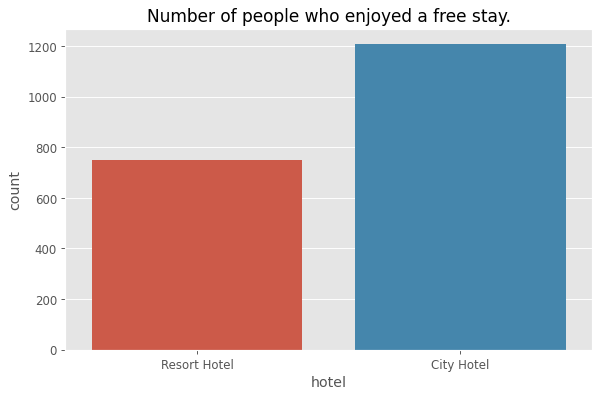

In [17]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Number of people who enjoyed a free stay.')
sns.countplot(x='hotel', data=free_stay)
plt.show()

There is a difference of **37%** between the two hotels in favor of city hotels. Let's see if this percentage is also respected on all the data.

In [18]:
hotel_origin[hotel_origin['adr'] > 0].groupby(['hotel']).count()['adr']

hotel
City Hotel      78122
Resort Hotel    39308
Name: adr, dtype: int64

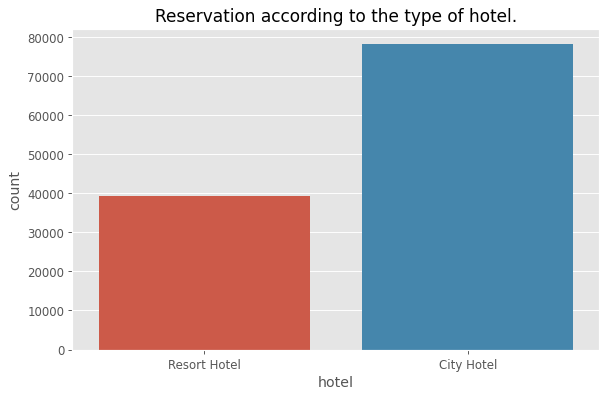

In [19]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Reservation according to the type of hotel.')
sns.countplot(x='hotel', 
              data=hotel_origin[hotel_origin['adr'] > 0]
            )
plt.show()

As expected more than 50% of reservations were for city hotels

Create a tally chart for each day of the week that people arrived.

Country

In [20]:
free_stay['country'].value_counts().head(10)

PRT    1550
ESP      79
GBR      73
FRA      55
DEU      41
ITA      17
BRA      13
USA      11
POL      10
BEL       8
Name: country, dtype: int64

In [21]:
hotel_origin['country'].value_counts().head(10)

PRT    48590
GBR    12128
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

What is the average number of nights for a stay?

In [22]:
total_stay_days = hotel_origin['stays_in_week_nights'] + hotel_origin['stays_in_weekend_nights']

round(total_stay_days.mean(),2)

3.43

What is the average total cost of a stay?

In [23]:
total_paid = hotel_origin['adr'] * total_stay_days
round(total_paid.mean(),2)

357.85

people who made special requests?

In [24]:
hotel_origin['total_of_special_requests'].value_counts()

0    70317
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

Arrival date

In [25]:
hotel_origin['reservation_status_date'] = pd.to_datetime(hotel_origin['reservation_status_date'])
hotel_origin['arrival_date'] = pd.to_datetime(hotel_origin['arrival_date'])

In [26]:
hotel_origin['arrival_date'].dt.month.min(), hotel_origin['arrival_date'].dt.month.max()

(1, 12)

In [27]:
hotel_origin['arrival_date'].dt.day.min(), hotel_origin['arrival_date'].dt.day.max()

(1, 31)

In [28]:
month_and_day = hotel_origin['arrival_date'].dt.day + hotel_origin['arrival_date'].dt.month * 100

In [29]:
month_and_day.min(), month_and_day.max()

(101, 1231)

In [30]:
# winter: 21 Dec to 20 Mars
# spring: 21 Mars to 20 Jun
# summer: 21 Jun to 20 Sep
# fall: 21 Sep to 20 Dec

season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']
FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp = pd.cut(
    month_and_day,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

hotel_origin['season'] = temp.str.replace('2', '')

In [31]:
hotel_origin.groupby(['season']).mean()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
season,,,,,,,,,,,,,,,,,,
fall,0.362193,103.348865,0.856958,2.283928,1.778422,0.057217,0.006270,0.035349,0.118196,0.124662,0.202532,80.057036,184.843418,3.948466,84.685349,0.060509,0.517459,56320.968766
spring,0.402984,108.393528,0.896470,2.466461,1.854869,0.087114,0.005678,0.028655,0.028302,0.148338,0.203177,90.558562,200.052196,3.294910,105.782876,0.054928,0.530656,62919.880171
summer,0.378158,130.400650,1.044908,2.760943,1.962107,0.162233,0.011295,0.019664,0.133478,0.091739,0.218039,84.506927,162.588492,0.674485,126.030507,0.066874,0.662784,59506.900433
winter,0.320083,55.826452,0.863427,2.371614,1.775368,0.086796,0.007795,0.052565,0.065108,0.207125,0.214615,92.145203,199.132168,1.719058,76.130202,0.068984,0.544552,58972.551825


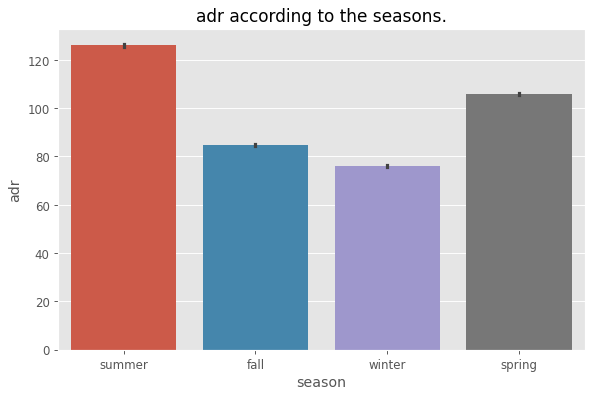

In [32]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin)
plt.show()

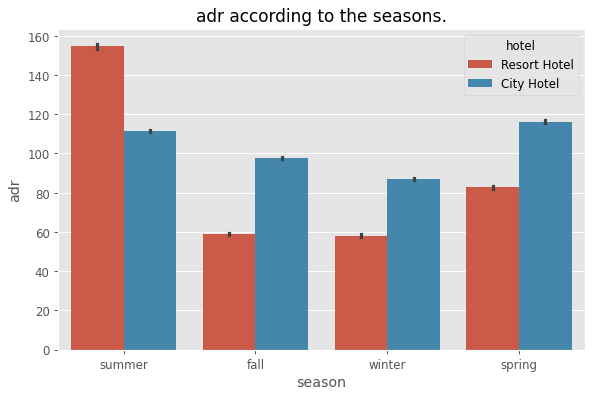

In [33]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin, hue='hotel')
plt.show()

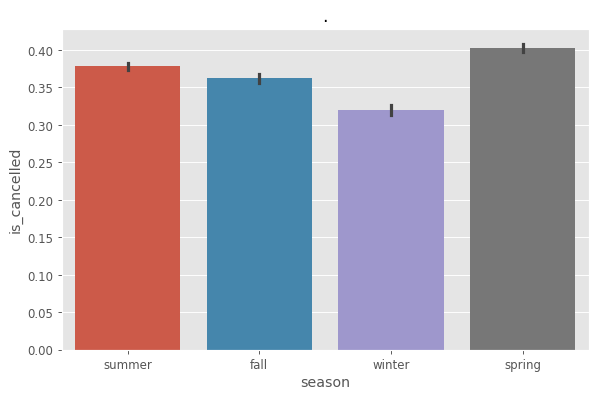

In [34]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.barplot(x='season', y='is_cancelled', data=hotel_origin)
plt.show()

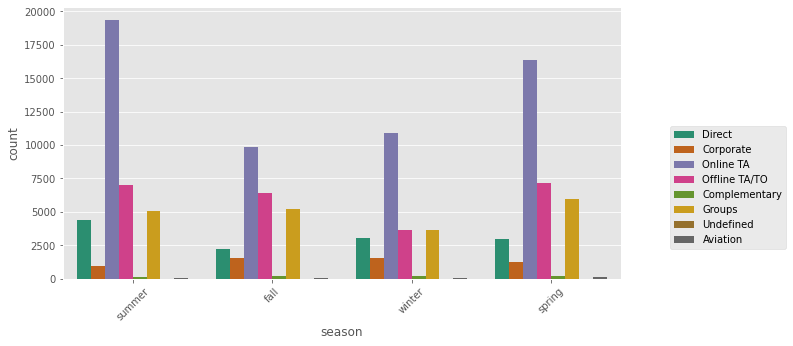

In [35]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x='season', data=hotel_origin,
              hue='market_segment',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

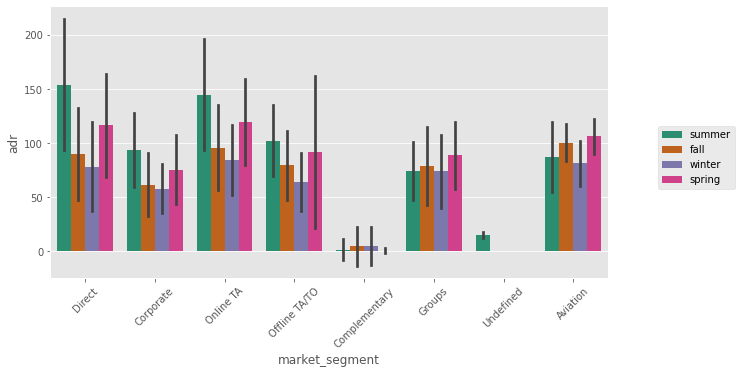

In [36]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(x='market_segment', y='adr', data=hotel_origin,
              hue='season',
              estimator=np.mean,
              ci='sd',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

week night weekend night

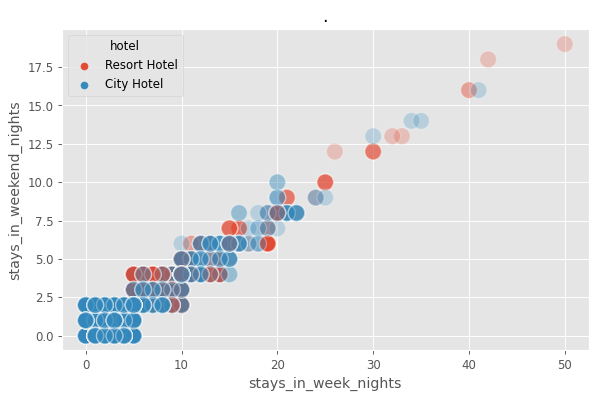

In [37]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='stays_in_weekend_nights', x='stays_in_week_nights',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

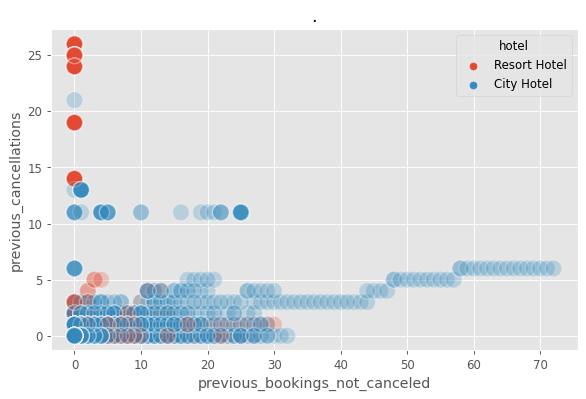

In [38]:
# previous_cancellations, previous_bookings_not_canceled
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='previous_cancellations', x='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

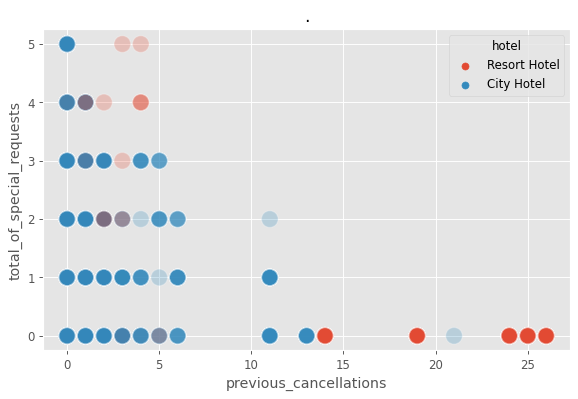

In [39]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='total_of_special_requests', x='previous_cancellations',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

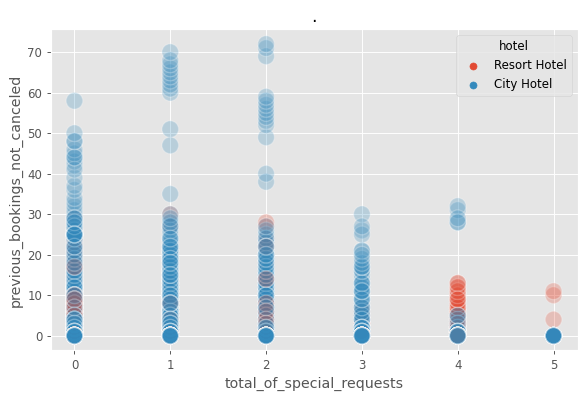

In [40]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(x='total_of_special_requests', y='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

In [41]:
hotel_origin['arrival_date'].dt.day_name().value_counts()

Friday       19631
Thursday     19254
Monday       18171
Saturday     18055
Wednesday    16139
Sunday       14140
Tuesday      13999
Name: arrival_date, dtype: int64

# Feature Engineering

## Feature Characteristics

#### **Missing Data**

In [42]:
def missing_data(df):
  for col in df.columns:
    s = round(df[col].isna().mean() * 100, 3)
    if s > 0:
      print(f"{col}: {s}%")

In [43]:
missing_data(df_train)

children: 0.003%
country: 0.404%
agent: 13.659%
company: 94.324%


In [44]:
missing_data(df_test)

children: 0.017%
country: 0.502%
agent: 14.195%
company: 93.981%


There are over 93% missing values in the `company` variable and over 13% in the `agent` variable. `agent` is a categorical variable, this is ID of the travel agency that made the booking. ID is presented instead of designation for anonymity reasons. “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

Agent Missing data Not At Random (MNAR)
Can we infer this by looking at the data?

If data is MNAR, we could expect a greater number of missing values for cutomer who did not make online/offline tour agent/tour operator.

In [45]:
hotel_origin.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19810
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [46]:
hotel_origin['agent'].isnull().groupby(hotel_origin['market_segment']).mean()

market_segment
Aviation         0.894515
Complementary    0.861373
Corporate        0.867611
Direct           0.476519
Groups           0.209389
Offline TA/TO    0.016062
Online TA        0.006162
Undefined        1.000000
Name: agent, dtype: float64

In [47]:
ta = ['Online TA', 'Offline TA/TO']
singular = ['Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined']

ta_to_agent = hotel_origin[hotel_origin.market_segment.isin(ta)][['agent']]
ta_to_agent.isna().sum() * 100. / len(ta_to_agent)

agent    0.913304
dtype: float64

In [48]:
no_agent = hotel_origin[hotel_origin.market_segment.isin(singular)][['agent']]
no_agent.isna().sum() * 100. / len(no_agent)

agent    40.325123
dtype: float64

### **agent**

In [49]:
df_train['agent'].mean(), df_train['agent'].median()

(86.45947629649298, 14.0)

In [50]:
df_train['company'].mean(), df_train['company'].median()

(189.1951219512195, 179.0)

In [51]:
for_mean = df_train.copy()
for_mean['agent'] = for_mean['agent'].fillna(1000)
for_mean['agent'].mean(), for_mean['agent'].median()

(211.2437196342442, 28.0)

In [52]:
df_train['agent'].var(), for_mean['agent'].var()

(12223.471825137043, 108979.02650244527)

In [53]:
for_mean = df_train.copy()
missing_data(for_mean)

children: 0.003%
country: 0.404%
agent: 13.659%
company: 94.324%


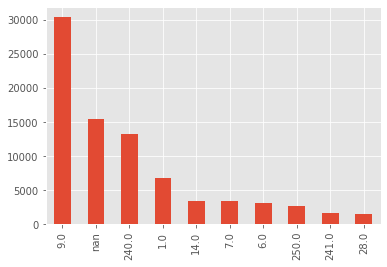

In [54]:
for_mean.agent.value_counts(dropna=False).head(10).plot.bar()

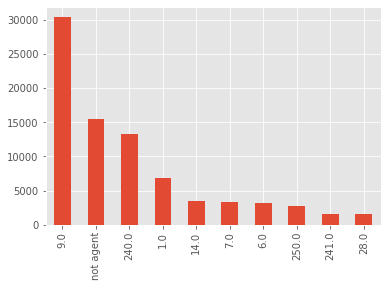

In [55]:
for_mean['agent'] = for_mean['agent'].fillna('not agent')
for_mean.agent.value_counts().head(10).plot.bar();

In [56]:
# extract numerical part
for_mean['agent_numeric'] = pd.to_numeric(
    for_mean['agent'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
for_mean['agent_categoric'] = np.where(
    for_mean['agent_numeric'].isnull(),
    for_mean['agent'],
    np.nan
)

for_mean.head(2)

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking,agent_numeric,agent_categoric
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,not agent,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0,NaN,not agent
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,not agent,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1,NaN,not agent


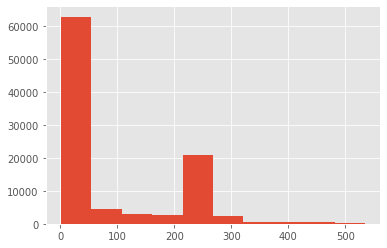

In [57]:
for_mean['agent_numeric'].hist()

In [58]:
for_mean['agent_categoric'].unique()
# for nan we can easialy replaced with 'agent' and we get two categories

array(['not agent', nan], dtype=object)

In [59]:
missing_data(for_mean)

children: 0.003%
country: 0.404%
company: 94.324%
agent_numeric: 13.659%
agent_categoric: 86.341%


In [60]:
sorted(for_mean['agent_numeric'].unique().tolist())

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 47.0,
 50.0,
 52.0,
 53.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 63.0,
 64.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 81.0,
 82.0,
 83.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 94.0,
 95.0,
 96.0,
 98.0,
 99.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 117.0,
 118.0,
 119.0,
 121.0,
 122.0,
 126.0,
 127.0,
 128.0,
 129.0,
 132.0,
 133.0,
 134.0,
 135.0,
 138.0,
 139.0,
 141.0,
 142.0,
 143.0,
 144.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 162.0,
 163.0,
 165.0,
 167.0,
 168.0,
 170.0,
 171.0,
 173.0,


In [61]:
# nan--> 536
for_mean_536 = for_mean.copy()
for_mean_536 = for_mean_536.fillna(536)
for_mean.agent_numeric.var(), for_mean_536.agent_numeric.var()

(12223.471825137043, 34387.338452212156)

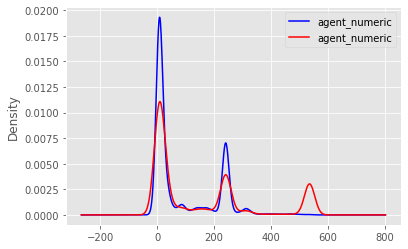

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
for_mean['agent_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
for_mean_536['agent_numeric'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [63]:
# nan--> -1
for_mean_minus_one = for_mean.copy()
for_mean_minus_one = for_mean_minus_one.fillna(-1)
for_mean.agent_numeric.var(), for_mean_minus_one.agent_numeric.var()

(12223.471825137043, 11455.92343574555)

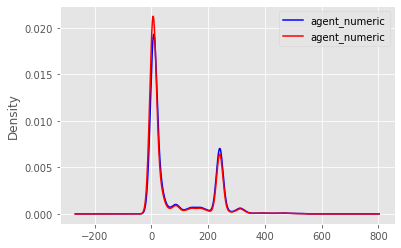

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
for_mean['agent_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
for_mean_minus_one['agent_numeric'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

### for agent: if numeric **-1** if categoric **agent**

### **company**

same as agent

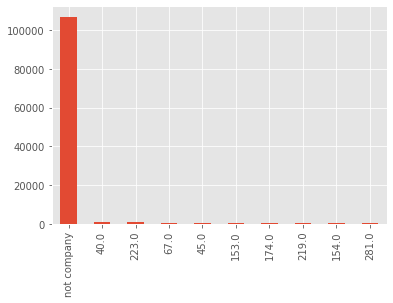

In [65]:
for_mean['company'] = for_mean['company'].fillna('not company')
for_mean.company.value_counts().head(10).plot.bar();

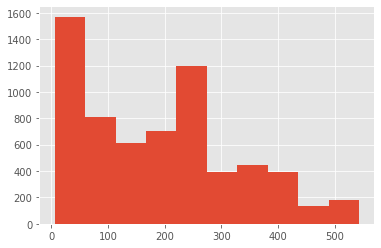

In [66]:
# extract numerical part
for_mean['company_numeric'] = pd.to_numeric(
    for_mean['company'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
for_mean['company_categoric'] = np.where(
    for_mean['company_numeric'].isnull(),
    for_mean['company'],
    np.nan
)

for_mean['company_numeric'].hist();

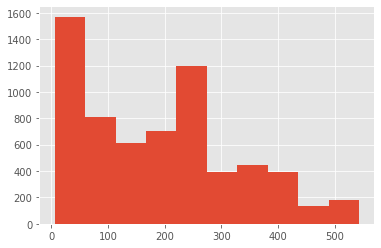

In [67]:
for_mean['company_numeric'].hist();

In [68]:
for_mean['company_categoric'].unique()
# just replace nan with 'company

array(['not company', nan], dtype=object)

In [69]:
sorted(for_mean['company_numeric'].unique().tolist())

[nan,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 28.0,
 29.0,
 31.0,
 32.0,
 34.0,
 35.0,
 37.0,
 38.0,
 39.0,
 40.0,
 42.0,
 43.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 51.0,
 52.0,
 53.0,
 54.0,
 59.0,
 61.0,
 62.0,
 64.0,
 65.0,
 67.0,
 68.0,
 71.0,
 72.0,
 73.0,
 76.0,
 77.0,
 78.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 88.0,
 91.0,
 92.0,
 93.0,
 94.0,
 96.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 115.0,
 116.0,
 118.0,
 120.0,
 122.0,
 126.0,
 127.0,
 130.0,
 132.0,
 135.0,
 137.0,
 139.0,
 140.0,
 142.0,
 143.0,
 144.0,
 146.0,
 148.0,
 149.0,
 150.0,
 153.0,
 154.0,
 158.0,
 159.0,
 160.0,
 163.0,
 165.0,
 167.0,
 168.0,
 169.0,
 174.0,
 178.0,
 179.0,
 180.0,
 183.0,
 184.0,
 185.0,
 186.0,
 192.0,
 193.0,
 195.0,
 197.0,
 200.0,
 202.0,
 203.0,
 204.0,
 207.0,
 209.0,
 210.0,
 212.0,
 215.0,
 216.0,
 217.0,
 218.0,
 219.0,
 220.0,
 221.0,
 222.0,
 223.0,
 224.0,


In [70]:
# min=6, max=543
for_mean['company_numeric_1'] = for_mean['company_numeric'].fillna(-1)
for_mean['company_numeric'].var(), for_mean['company_numeric_1'].var()

(17313.27982082493, 2919.237969736663)

In [71]:
for_mean['company_numeric_544'] = for_mean['company_numeric'].fillna(544)
for_mean['company_numeric'].var(), for_mean['company_numeric_544'].var()

(17313.27982082493, 7722.258974818397)

In [72]:
for_mean['company_numeric_0'] = for_mean['company_numeric'].fillna(0)
for_mean['company_numeric'].var(), for_mean['company_numeric_0'].var()

(17313.27982082493, 2898.9261622832873)

In [73]:
train_mean = for_mean['company_numeric'].mean()
for_mean['company_numeric_mean'] = for_mean['company_numeric'].fillna(train_mean)
for_mean['company_numeric'].var(), for_mean['company_numeric_mean'].var()

(17313.27982082493, 982.543285542724)

In [74]:
train_median = for_mean['company_numeric'].median()
for_mean['company_numeric_median'] = for_mean['company_numeric'].fillna(train_median)
for_mean['company_numeric'].var(), for_mean['company_numeric_median'].var()

(17313.27982082493, 988.1080560980062)

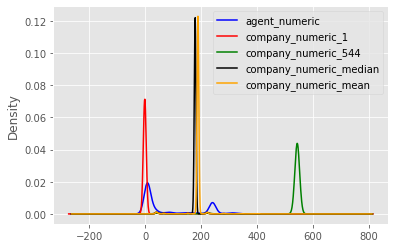

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
for_mean['agent_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
for_mean['company_numeric_1'].plot(kind='kde', ax=ax, color='red')
for_mean['company_numeric_544'].plot(kind='kde', ax=ax, color='green')
for_mean['company_numeric_median'].plot(kind='kde', ax=ax, color='black')
for_mean['company_numeric_mean'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [76]:
missing_data(for_mean)

children: 0.003%
country: 0.404%
agent_numeric: 13.659%
agent_categoric: 86.341%
company_numeric: 94.324%
company_categoric: 5.676%


### for company if numeric **1** if categoric **company**

## children

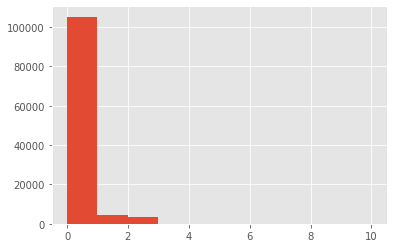

In [77]:
df_train['children'].hist()

In [78]:
IQR = for_mean['children'].quantile(0.75) - for_mean['children'].quantile(
    0.25)
# calculate the upper boundary
extreme_value = for_mean['children'].quantile(0.75) + 3 * IQR
extreme_value

0.0

In [79]:
for_mean['children_imputed'] = for_mean['children'].fillna(extreme_value)
for_mean['children'].var(), for_mean['children_imputed'].var()

(0.15918198877813383, 0.15917806527322442)

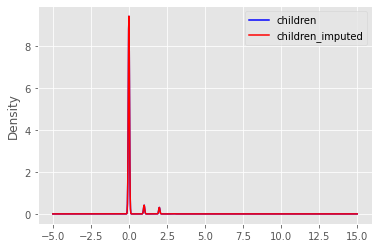

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
for_mean['children'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
for_mean['children_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [81]:
for_mean['children'].isnull().sum(), for_mean['children_imputed'].isnull().sum()

(3, 0)

In [82]:
train_child_mean = for_mean['children'].mean()
for_mean['children_mean'] = for_mean['children'].fillna(train_child_mean)
for_mean['children'].var(), for_mean['children_mean'].var()

(0.15918198877813383, 0.15917777791147245)

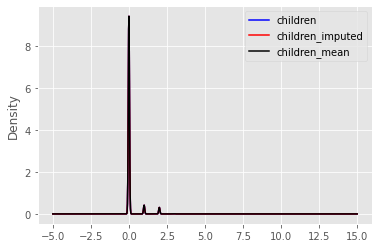

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
for_mean['children'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
for_mean['children_imputed'].plot(kind='kde', ax=ax, color='red')
for_mean['children_mean'].plot(kind='kde', ax=ax, color='k')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [84]:
# df_train['agent'].fillna(1000, inplace=True)
# df_test['agent'].fillna(1000, inplace=True)

# df_train['company'].fillna(1000, inplace=True)
# df_test['company'].fillna(1000, inplace=True)

In [85]:
missing_data(df_train)

children: 0.003%
country: 0.404%
agent: 13.659%
company: 94.324%


In [86]:
missing_data(df_test)

children: 0.017%
country: 0.502%
agent: 14.195%
company: 93.981%


## country

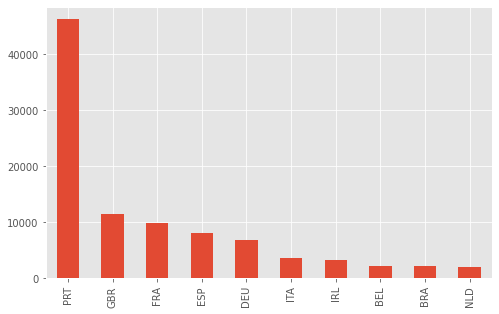

In [87]:
plt.figure(figsize=(8, 5))
for_mean['country'].value_counts(dropna=False).head(10).plot.bar()
plt.show()

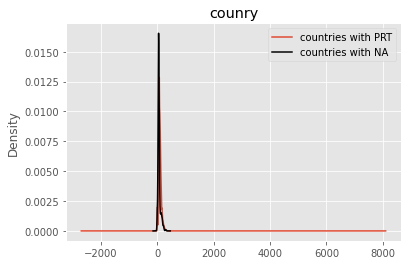

In [88]:
# data MCAR
# Na < 5%
# ==> Frequent category

# let's plot the distribution of the adr for the countries that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot countrie with the most frequent label
for_mean[for_mean['country']=='PRT']['adr'].plot(kind='kde', ax=ax)

# select and plot countries with missing data in the variable
for_mean[for_mean['country'].isnull()]['adr'].plot(kind='kde', ax=ax, color='k')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['countries with PRT', 'countries with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('counry')
plt.show()

### for country replace NA with mode PRT

In [89]:
missing_data(for_mean)

children: 0.003%
country: 0.404%
agent_numeric: 13.659%
agent_categoric: 86.341%
company_numeric: 94.324%
company_categoric: 5.676%


# Transform to Mixte Variable

In [90]:
# agent
df_train['agent'] = df_train['agent'].fillna('not agent')
df_test['agent'] = df_test['agent'].fillna('not agent')

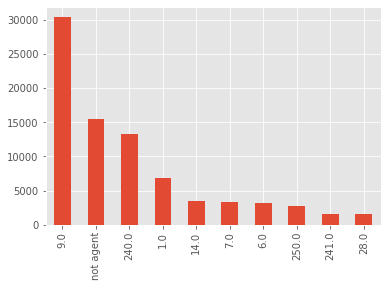

In [91]:
df_train['agent'].value_counts().head(10).plot.bar()

In [92]:
# company
df_train['company'] = df_train['company'].fillna('not company')
df_test['company'] = df_test['company'].fillna('not company')

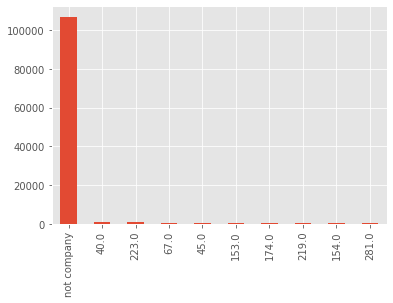

In [93]:
df_train['company'].value_counts().head(10).plot.bar()

In [94]:
# agent train data set

# extract numerical part
df_train['agent_numeric'] = pd.to_numeric(
    df_train['agent'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_train['agent_categoric'] = np.where(
    df_train['agent_numeric'].isnull(),
    df_train['agent'],
    np.nan
)

# agent test data set

# extract numerical part
df_test['agent_numeric'] = pd.to_numeric(
    df_test['agent'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_test['agent_categoric'] = np.where(
    df_test['agent_numeric'].isnull(),
    df_test['agent'],
    np.nan
)

# company

# company train dat set
# extract numerical part
df_train['company_numeric'] = pd.to_numeric(
    df_train['company'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_train['company_categoric'] = np.where(
    df_train['company_numeric'].isnull(),
    df_train['company'],
    np.nan
)

# company test dat set
# extract numerical part
df_test['company_numeric'] = pd.to_numeric(
    df_test['company'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_test['company_categoric'] = np.where(
    df_test['company_numeric'].isnull(),
    df_test['company'],
    np.nan
)

In [95]:
# children
df_train['children'] = df_train['children'].fillna(0)
df_test['children'] = df_test['children'].fillna(0)

# country
train_country_mode = df_train['country'].mode()[0]
df_train['country'] = df_train['country'].fillna(train_country_mode)
df_test['country'] = df_test['country'].fillna(train_country_mode)

# agent numeric
df_train['agent_numeric'] = df_train['agent_numeric'].fillna(-1)
df_test['agent_numeric'] = df_test['agent_numeric'].fillna(-1)

# agent categoric
df_train['agent_categoric'] = df_train['agent_categoric'].fillna("agent")
df_test['agent_categoric'] = df_test['agent_categoric'].fillna("agent")

# company numeric
df_train['company_numeric'] = df_train['company_numeric'].fillna(1)
df_test['company_numeric'] = df_test['company_numeric'].fillna(1)

# agent categoric
df_train['company_categoric'] = df_train['company_categoric'].fillna("company")
df_test['company_categoric'] = df_test['company_categoric'].fillna("company")

In [96]:
# drop agent and company columns
df_train.drop(columns=['agent', 'company'], inplace=True)
df_test.drop(columns=['agent', 'company'], inplace=True)

In [97]:
missing_data(df_train)

In [98]:
missing_data(df_test)

In [99]:
df_train.company_categoric.value_counts()

not company    106972
company          6437
Name: company_categoric, dtype: int64

#### **Cardinality**

In [100]:
df_train['arrival_date'] = pd.to_datetime(df_train['arrival_date'])
df_test['arrival_date'] = pd.to_datetime(df_test['arrival_date'])
df_train['reservation_status_date'] = pd.to_datetime(df_train['reservation_status_date'])
df_test['reservation_status_date'] = pd.to_datetime(df_test['reservation_status_date'])

In [101]:
month_and_day_train = df_train['arrival_date'].dt.day + df_train['arrival_date'].dt.month * 100
month_and_day_test = df_test['arrival_date'].dt.day + df_test['arrival_date'].dt.month * 100

season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']
FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp_train = pd.cut(
    month_and_day_train,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

temp_test = pd.cut(
    month_and_day_test,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

df_train['season'] = temp_train.str.replace('2', '')
df_test['season'] = temp_test.str.replace('2', '')

In [102]:
target = df_train.drop(columns=['is_cancelled'])

numerical = [
    'lead_time', 
    'stays_in_weekend_nights', 
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'agent_numeric',
    'company_numeric',
]

categorical= [
    'hotel',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'is_repeated_guest',
    'agent_categoric',
    'company_categoric',
    'season',
]

In [103]:
for col in categorical:
  print(f"{col}: {len(df_train[col].unique())}")

hotel: 2
meal: 5
country: 174
market_segment: 8
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4
is_repeated_guest: 2
agent_categoric: 2
company_categoric: 2
season: 4


In [104]:
for col in categorical:
  print(f"{col}: {len(df_test[col].unique())}")

hotel: 2
meal: 5
country: 88
market_segment: 7
distribution_channel: 5
reserved_room_type: 9
assigned_room_type: 11
deposit_type: 3
customer_type: 4
is_repeated_guest: 2
agent_categoric: 2
company_categoric: 2
season: 4


#### **Rare Labels**

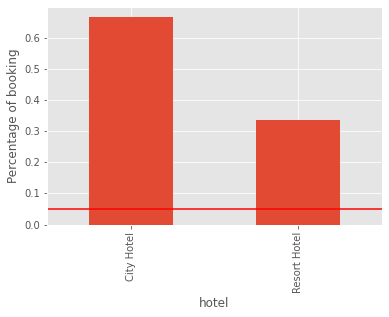

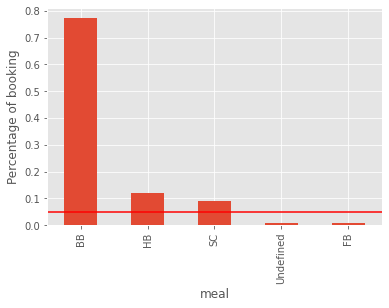

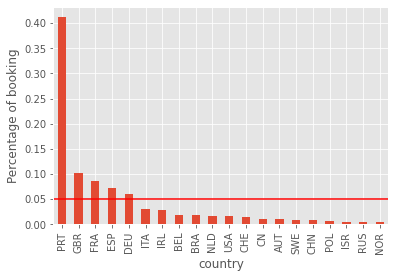

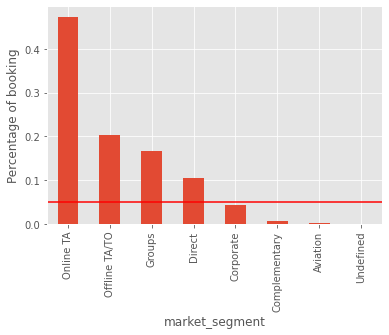

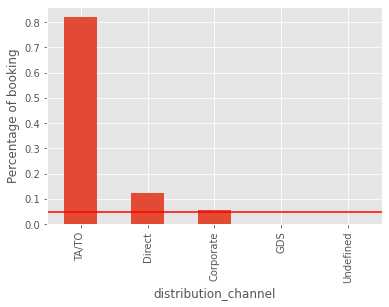

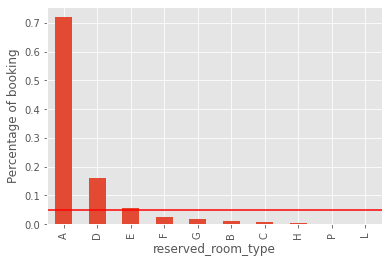

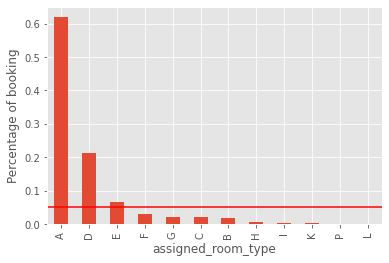

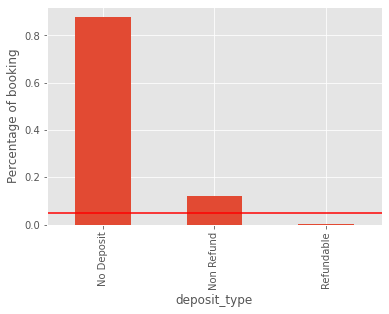

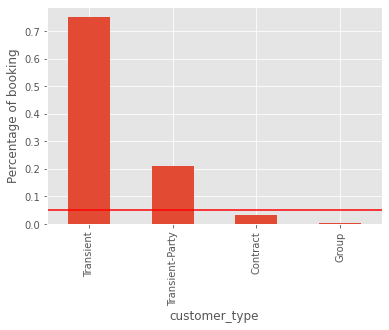

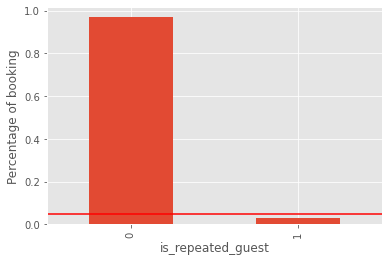

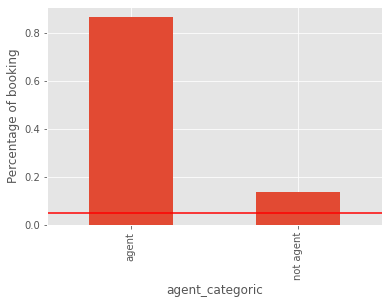

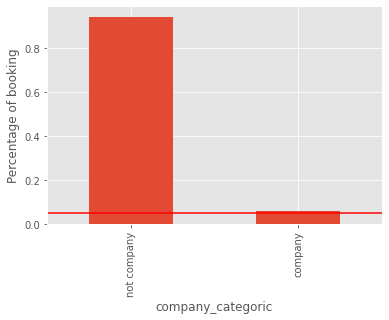

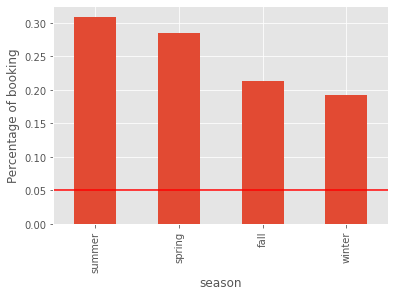

In [118]:
total_booking = len(df_train)

for col in categorical:
    temp_df = pd.Series(df_train[col].value_counts() / total_booking)

    fig = temp_df.head(20).sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of booking')
    plt.show()

### Rare label encoding

In [119]:
!pip install feature-engine --quiet

     |████████████████████████████████| 276 kB 7.5 MB/s 


In [127]:
cat_rare = [
    'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
    'customer_type'
]

In [129]:
from feature_engine.encoding import RareLabelEncoder

# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=3, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=cat_rare # variables to re-group
)  

In [130]:
rare_encoder.fit(df_train[cat_rare])

RareLabelEncoder(n_categories=3,
                 variables=['meal', 'country', 'market_segment',
                            'distribution_channel', 'reserved_room_type',
                            'assigned_room_type', 'deposit_type',
                            'customer_type'])

In [131]:
rare_encoder.variables_

['meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [132]:
# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

{'meal': Index(['BB', 'HB', 'SC'], dtype='object'),
 'country': Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU'], dtype='object'),
 'market_segment': Index(['Online TA', 'Offline TA/TO', 'Groups', 'Direct'], dtype='object'),
 'distribution_channel': Index(['TA/TO', 'Direct', 'Corporate'], dtype='object'),
 'reserved_room_type': Index(['A', 'D', 'E'], dtype='object'),
 'assigned_room_type': Index(['A', 'D', 'E'], dtype='object'),
 'deposit_type': array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object),
 'customer_type': Index(['Transient', 'Transient-Party'], dtype='object')}

In [133]:
df_train[cat_rare] = rare_encoder.transform(df_train[cat_rare])
df_test[cat_rare] = rare_encoder.transform(df_test[cat_rare])

In [136]:
df_train.country.value_counts()

PRT     46671
Rare    30280
GBR     11486
FRA      9890
ESP      8162
DEU      6919
Name: country, dtype: int64

### Encoding all categorical features

#### OHE for linear models

In [142]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    categories='auto',
    drop='first',
    sparse=False,
    handle_unknown='error'
)
encoder.fit(df_train[categorical])

# create dataframes special for linear models
df_train_ohe = df_train.copy()
df_test_ohe = df_test.copy()

tmp_train = encoder.transform(df_train[categorical])
tmp_train = pd.DataFrame(tmp_train)
tmp_train.columns = encoder.get_feature_names_out()

tmp_test = encoder.transform(df_test[categorical])
tmp_test = pd.DataFrame(tmp_test)
tmp_test.columns = encoder.get_feature_names_out()

In [141]:
encoder.categories_

[array(['City Hotel', 'Resort Hotel'], dtype=object),
 array(['BB', 'HB', 'Rare', 'SC'], dtype=object),
 array(['DEU', 'ESP', 'FRA', 'GBR', 'PRT', 'Rare'], dtype=object),
 array(['Direct', 'Groups', 'Offline TA/TO', 'Online TA', 'Rare'],
       dtype=object),
 array(['Corporate', 'Direct', 'Rare', 'TA/TO'], dtype=object),
 array(['A', 'D', 'E', 'Rare'], dtype=object),
 array(['A', 'D', 'E', 'Rare'], dtype=object),
 array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 array(['Rare', 'Transient', 'Transient-Party'], dtype=object),
 array([0, 1]),
 array(['agent', 'not agent'], dtype=object),
 array(['company', 'not company'], dtype=object),
 array(['fall', 'spring', 'summer', 'winter'], dtype=object)]

In [143]:
tmp_train.head()

,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [146]:
# df_train_ohe.drop(columns=categorical)
# df_test_ohe.drop(columns=categorical)
df_train_ohe = np.column_stack([df_train_ohe[numerical], tmp_train])
df_test_ohe = np.column_stack([df_test_ohe[numerical], tmp_test])

In [148]:
df_train_ohe = pd.DataFrame(df_train_ohe, columns=numerical+tmp_test.columns.to_list())
df_train_ohe.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,agent_numeric,company_numeric,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,342.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,737.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,304.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,1.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [150]:
df_train_ohe.shape

(113408, 47)

In [151]:
df_test_ohe = pd.DataFrame(df_test_ohe, columns=numerical+tmp_test.columns.to_list())
df_test_ohe.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,agent_numeric,company_numeric,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,113.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,82.88,0.0,2.0,156.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,97.00,0.0,0.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,81.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,210.00,1.0,0.0,250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,98.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,87.30,1.0,1.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,98.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,117.80,1.0,1.0,240.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
df_test_ohe.shape

(5981, 47)

In [153]:
missing_data(df_test_ohe)

### Ordinal encoding for tree and ensemble models

In [161]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

d = defaultdict(LabelEncoder)

# Encoding the variable
df_train[categorical] = df_train[categorical].apply(lambda x: d[x.name].fit_transform(x))

# # Using the dictionary to encode future data
df_test[categorical] = df_test[categorical].apply(lambda x: d[x.name].transform(x))


In [162]:
df_train.shape

(113408, 32)

#### **Linear model assumption**

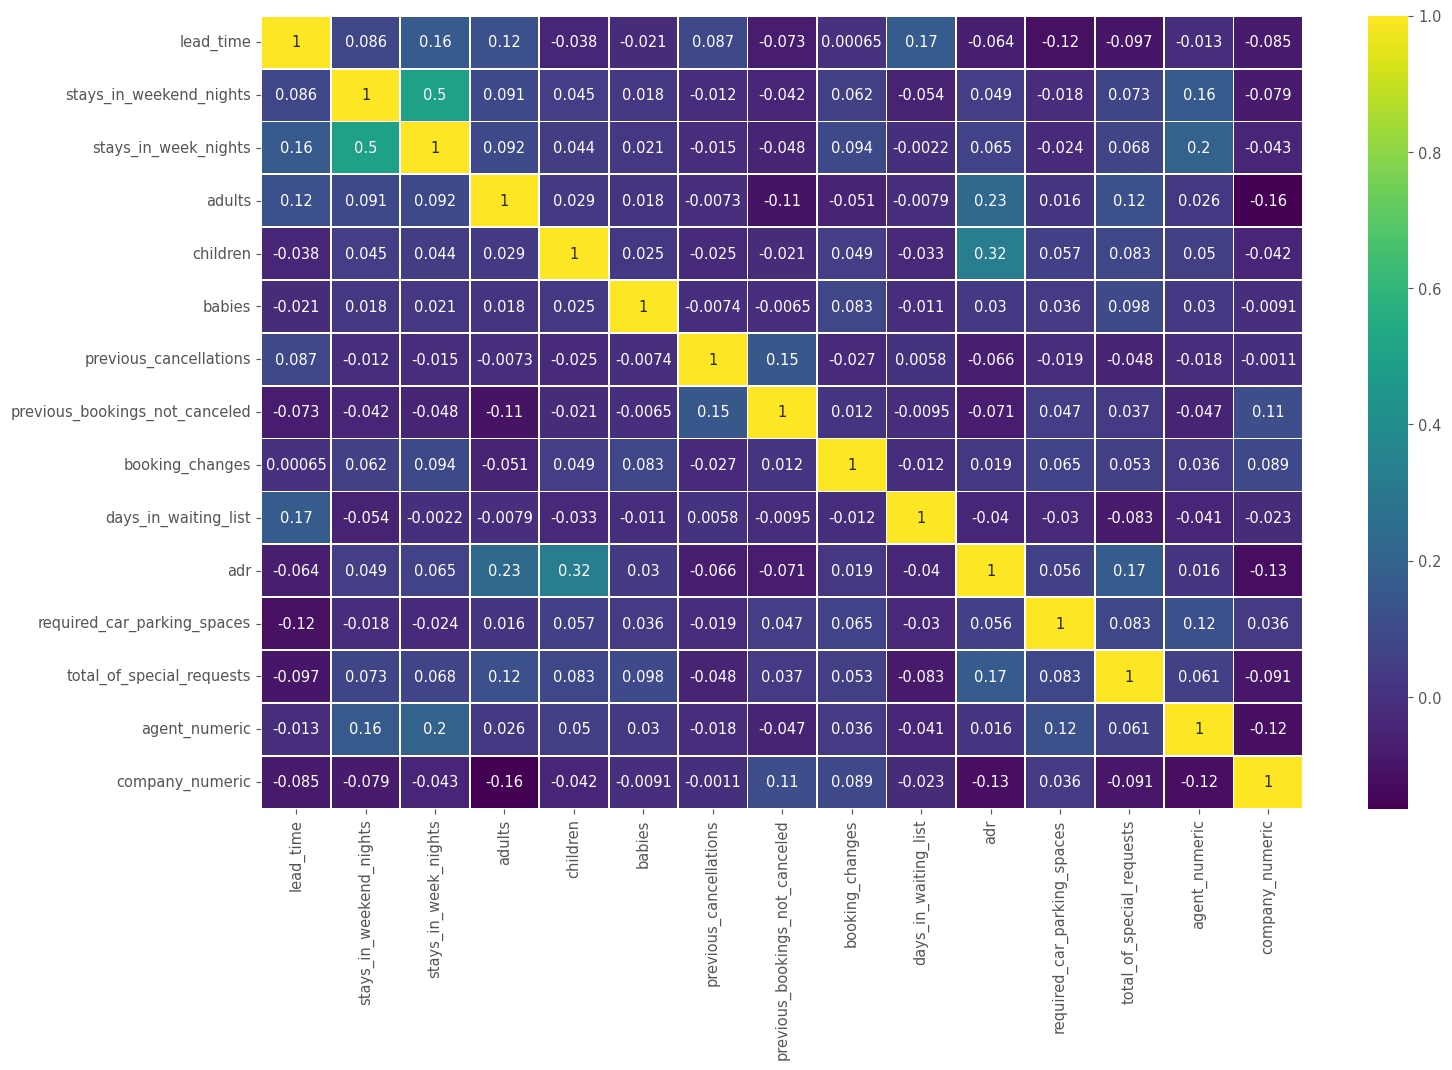

In [167]:
plt.figure(figsize=(16, 10), dpi=105)
sns.heatmap(df_train[numerical].corr(), 
            cmap='viridis',
            linewidth=0.5,annot=True
          )
plt.show()

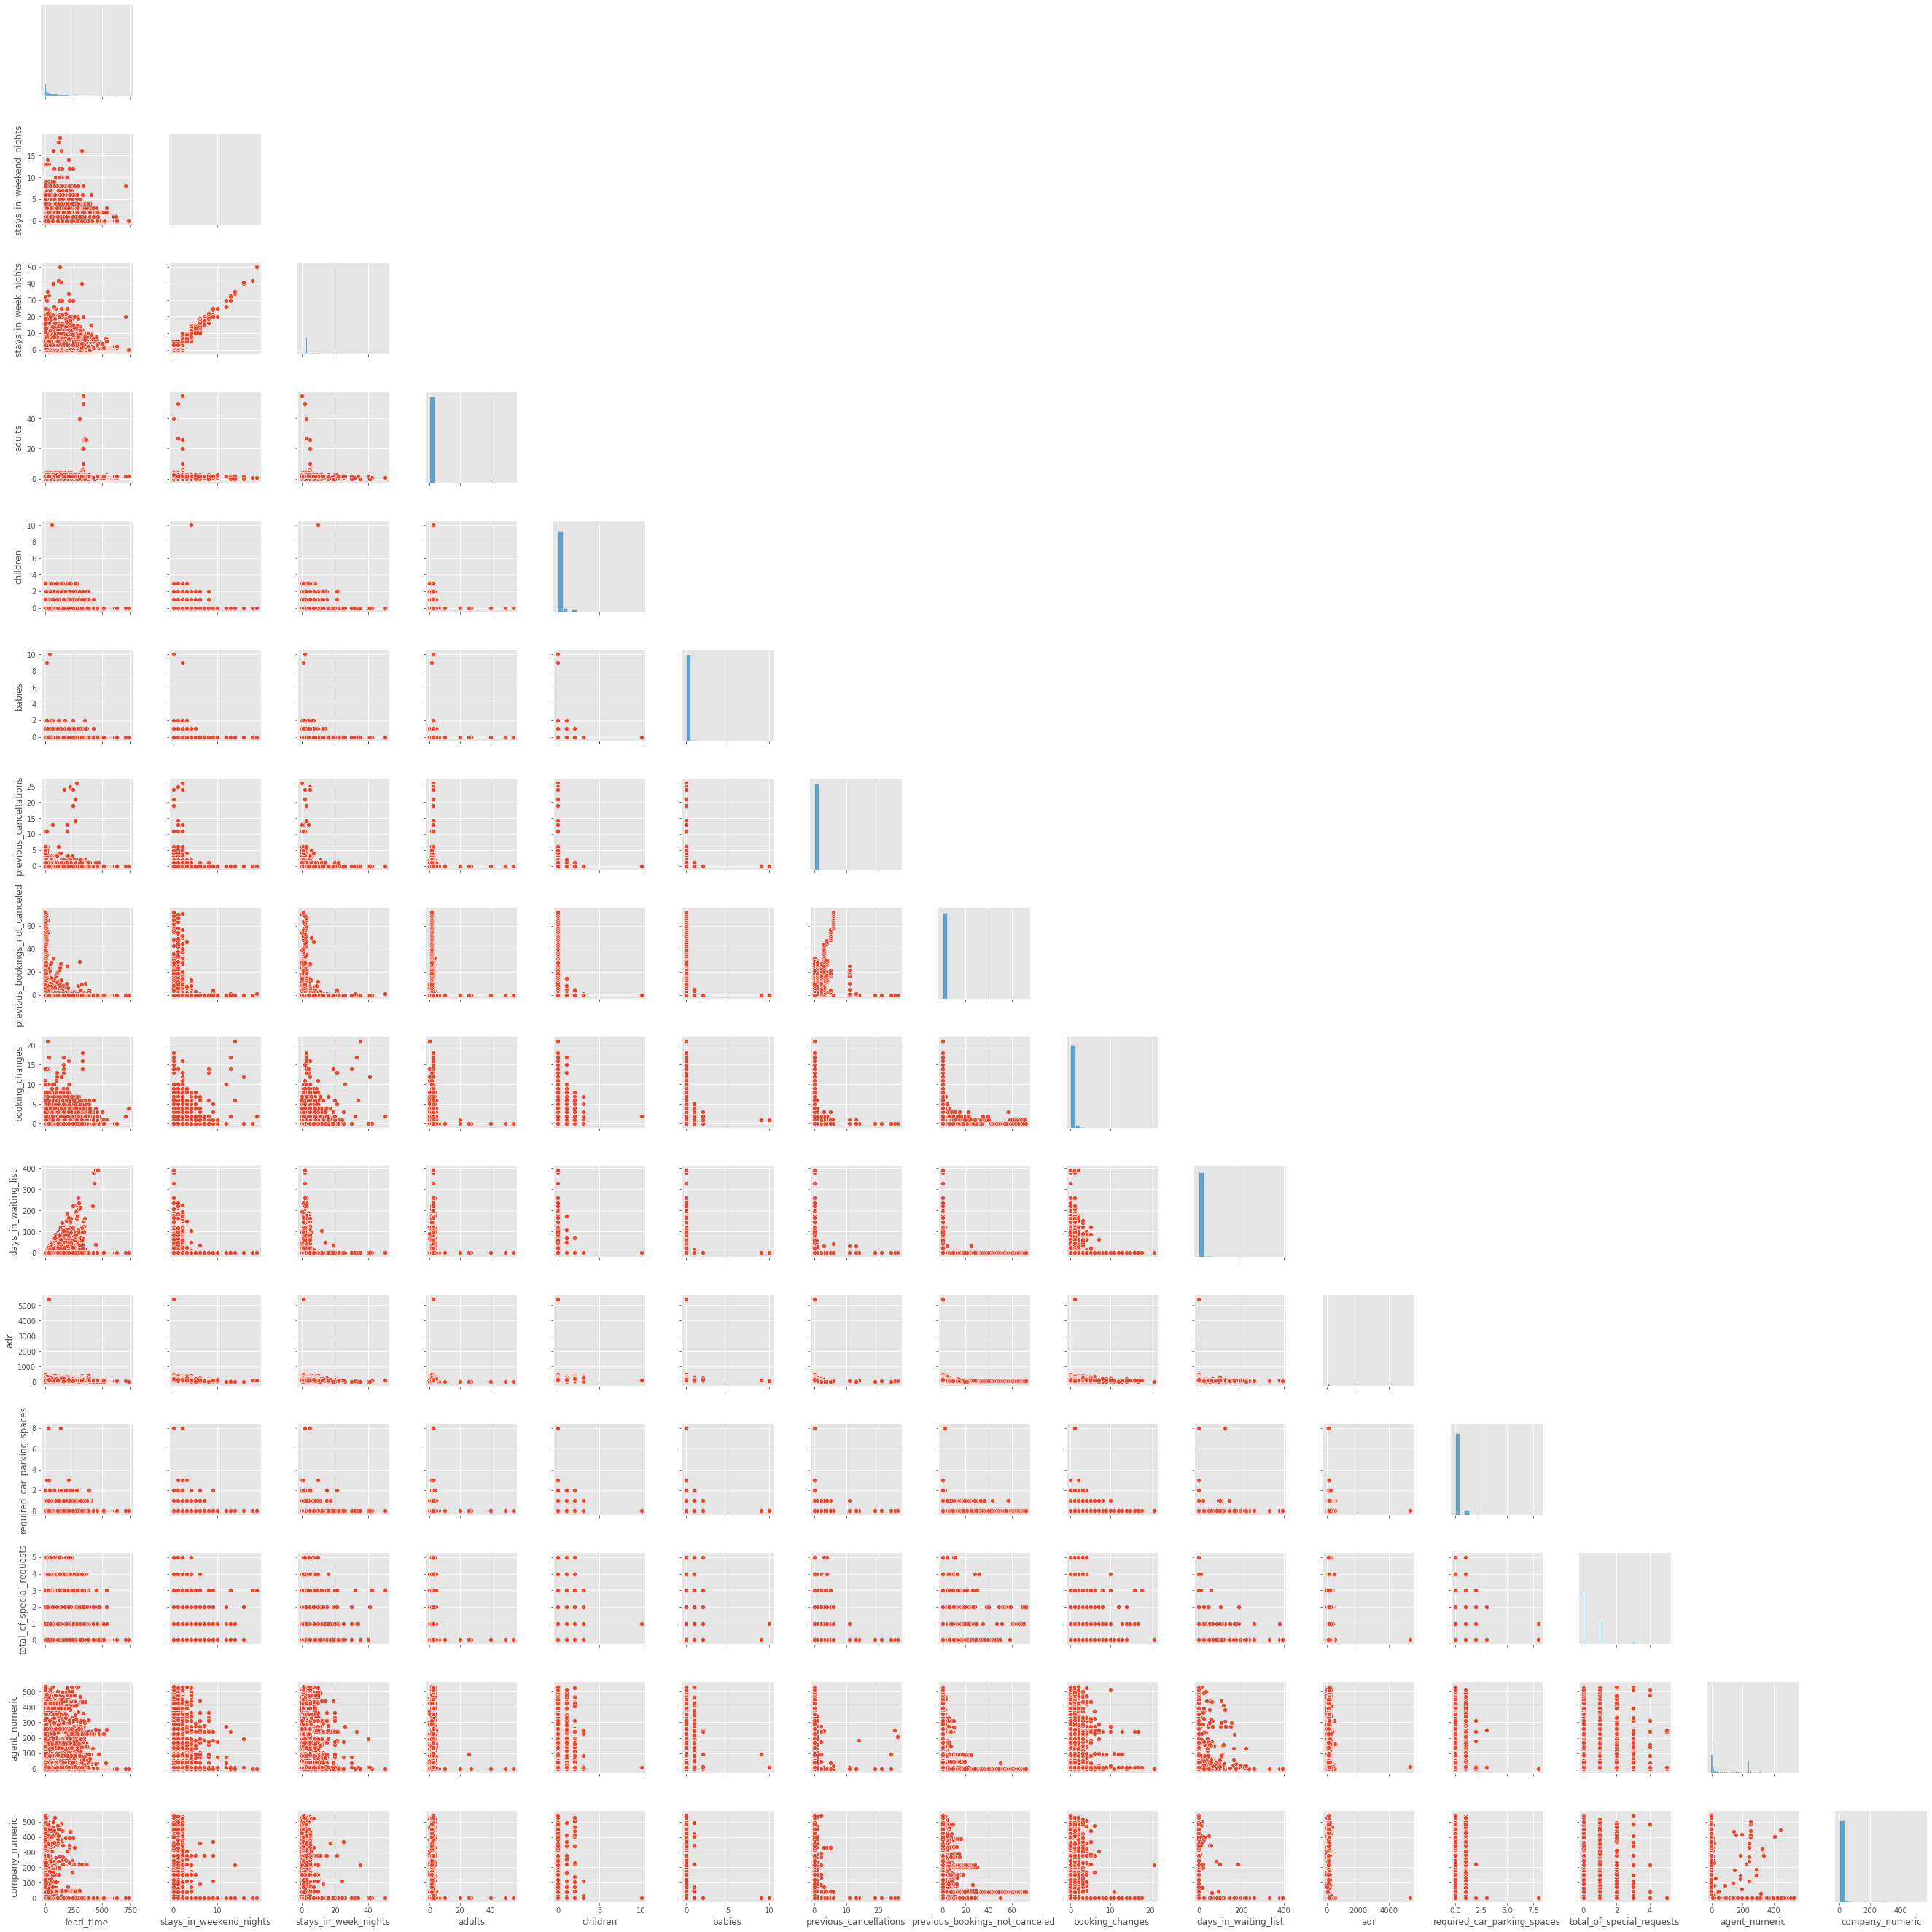

In [168]:
sns.pairplot(data=df_train[numerical], corner=True)

#### **Outliers**

In [107]:
# for Q-Q plots
import scipy.stats as stats

In [108]:
# Function to create a histogram, a Q-Q plot and
# a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [109]:
df_train.drop(index=14214, inplace=True)

lead_time


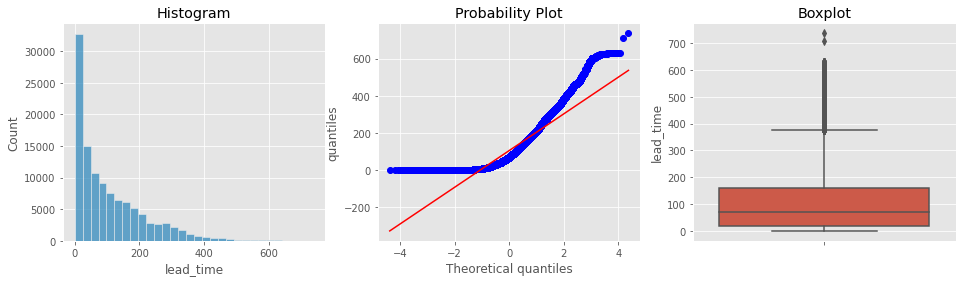


stays_in_weekend_nights


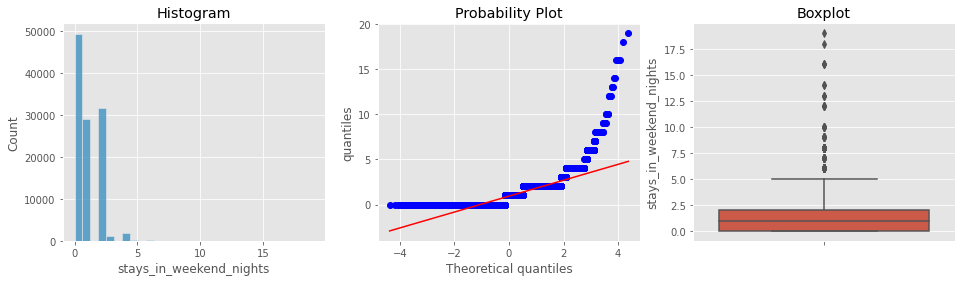


stays_in_week_nights


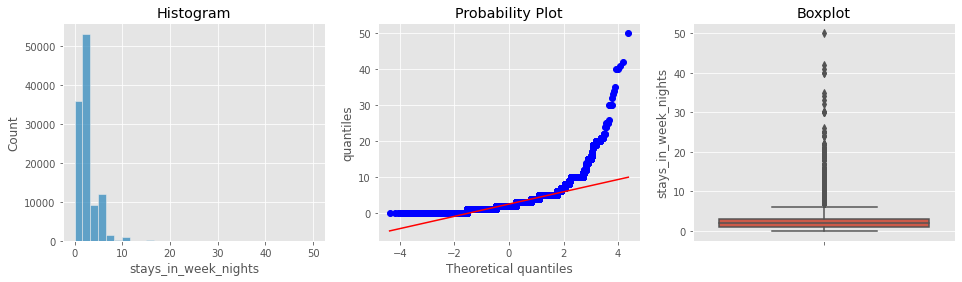


adults


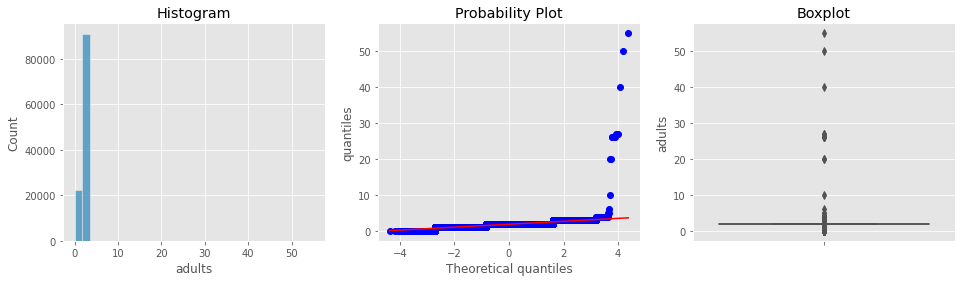


children


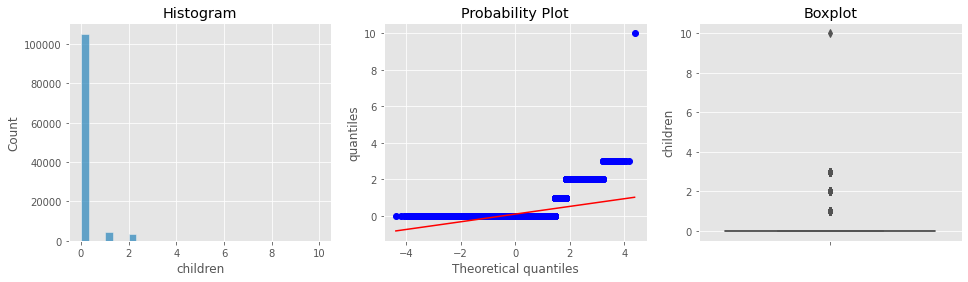


babies


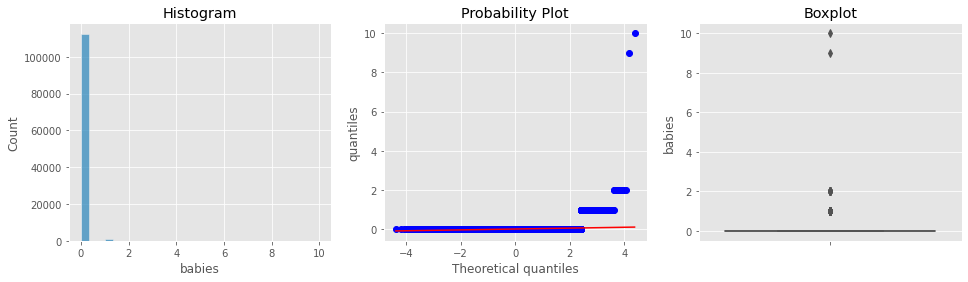


previous_cancellations


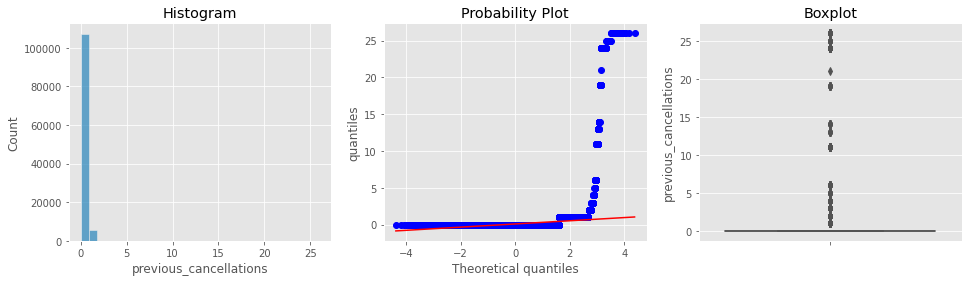


previous_bookings_not_canceled


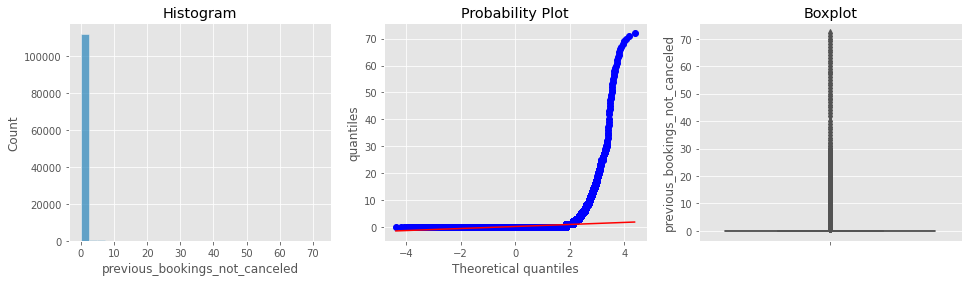


booking_changes


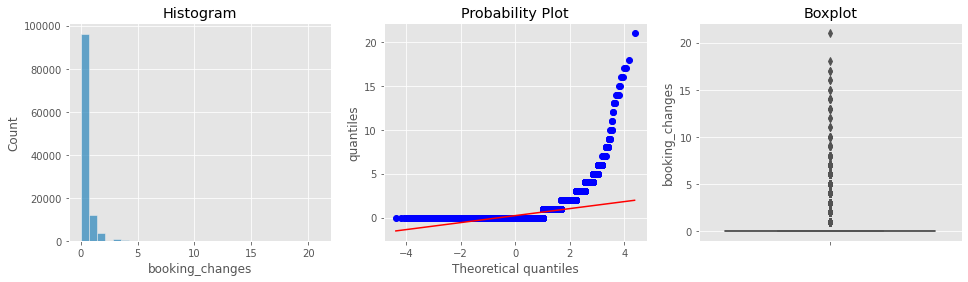


days_in_waiting_list


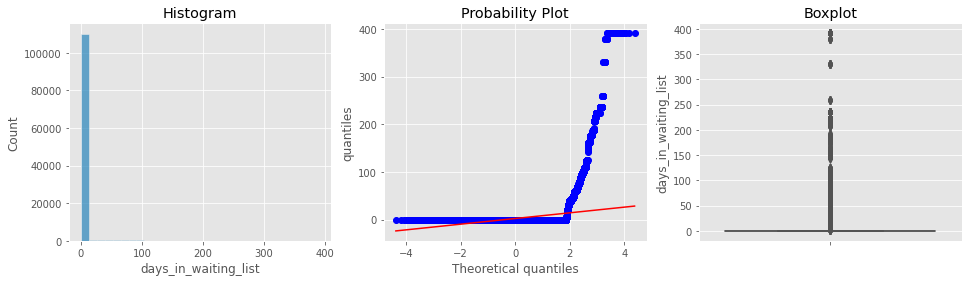


adr


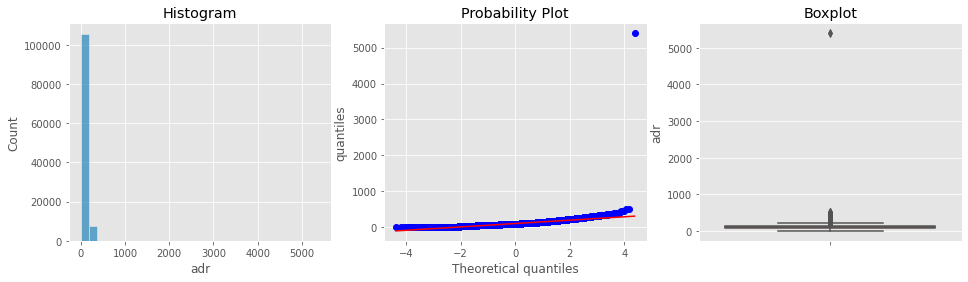


required_car_parking_spaces


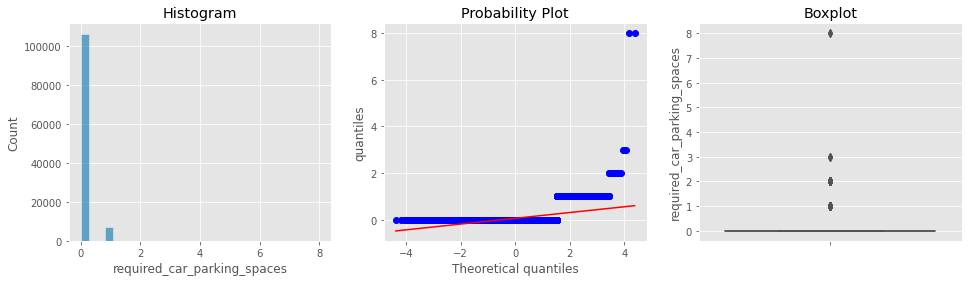


total_of_special_requests


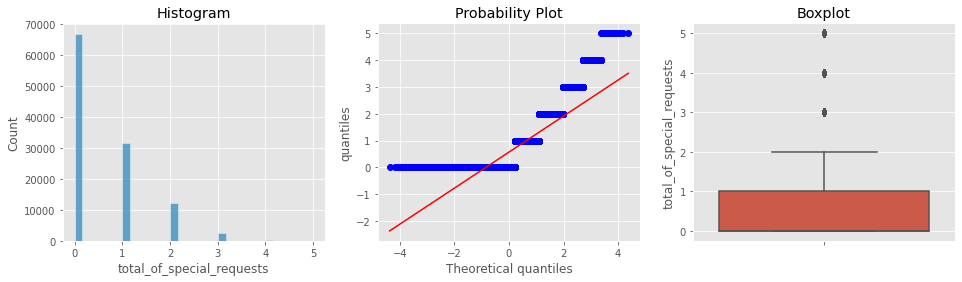


agent_numeric


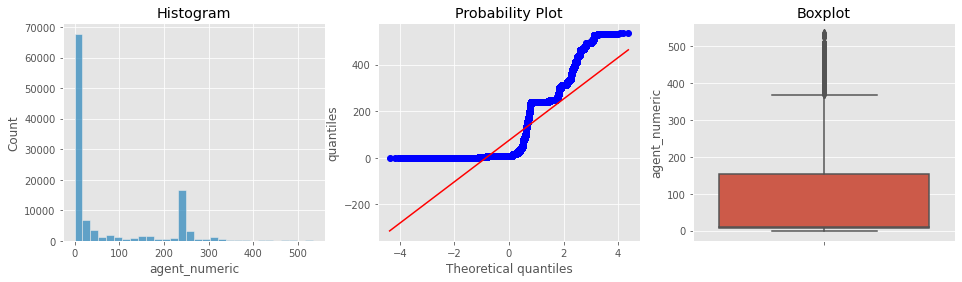


company_numeric


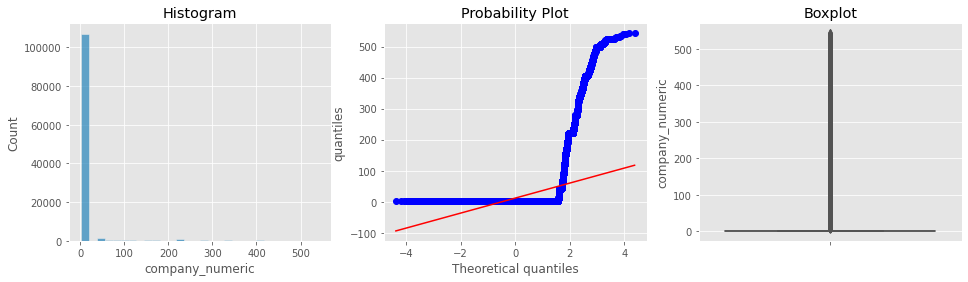

In [110]:
for col in numerical:
  print(col)
  diagnostic_plots(df_train, col)
  print()

All features are skewed

In [111]:
# Function to find upper and lower boundaries
# for skewed variables.


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries
    # for skewed distributions

    # The parameter "distance" gives us the option to
    # estimate 1.5 times or 3 times the IQR when defining
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return lower_boundary, upper_boundary

In [112]:
for col in numerical:
  print(f"{col}:")
  boundaries = find_skewed_boundaries(df_train, col, 1.5)
  print(f"boundaries: {boundaries}")
  upper_boundary = boundaries[1]
  print(f"Percentage bigger than upper boundary: {100.*len(df_train[df_train[col] > upper_boundary])/len(df_train)}")
  print()

lead_time:
boundaries: (-196.5, 375.5)
Percentage bigger than upper boundary: 2.4954147855530473

stays_in_weekend_nights:
boundaries: (-3.0, 5.0)
Percentage bigger than upper boundary: 0.21515237020316028

stays_in_week_nights:
boundaries: (-2.0, 6.0)
Percentage bigger than upper boundary: 2.805798532731377

adults:
boundaries: (2.0, 2.0)
Percentage bigger than upper boundary: 5.286223194130925

children:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 7.227003386004514

babies:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 0.7697869638826185

previous_cancellations:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 5.440533295711061

previous_bookings_not_canceled:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 3.0218326749435667

booking_changes:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 15.135616534988714

days_in_waiting_list:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 3.102073927765237

## Censoring outliers

In [172]:
from feature_engine.outliers import Winsorizer

# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=numerical)

windsoriser.fit(df_train[numerical])

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['lead_time', 'stays_in_weekend_nights',
                      'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations',
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr',
                      'required_car_parking_spaces',
                      'total_of_special_requests', 'agent_numeric',
                      'company_numeric'])

In [173]:
df_train_t = windsoriser.transform(df_train[numerical])

In [178]:
df_test_t = windsoriser.transform(df_test[numerical])

In [176]:
windsoriser.left_tail_caps_

{'lead_time': -196.5,
 'stays_in_weekend_nights': -3.0,
 'stays_in_week_nights': -2.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'booking_changes': 0.0,
 'days_in_waiting_list': 0.0,
 'adr': -15.462499999999991,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': -1.5,
 'agent_numeric': -210.5,
 'company_numeric': 1.0}

In [177]:
windsoriser.right_tail_caps_

{'lead_time': 375.5,
 'stays_in_weekend_nights': 5.0,
 'stays_in_week_nights': 6.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'booking_changes': 0.0,
 'days_in_waiting_list': 0.0,
 'adr': 210.8775,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': 2.5,
 'agent_numeric': 369.5,
 'company_numeric': 1.0}

In [179]:
df_train[numerical] = windsoriser.transform(df_train[numerical])
df_test[numerical] = windsoriser.transform(df_test[numerical])

df_train_ohe[numerical] = windsoriser.transform(df_train[numerical])
df_test_ohe[numerical] = windsoriser.transform(df_test[numerical])

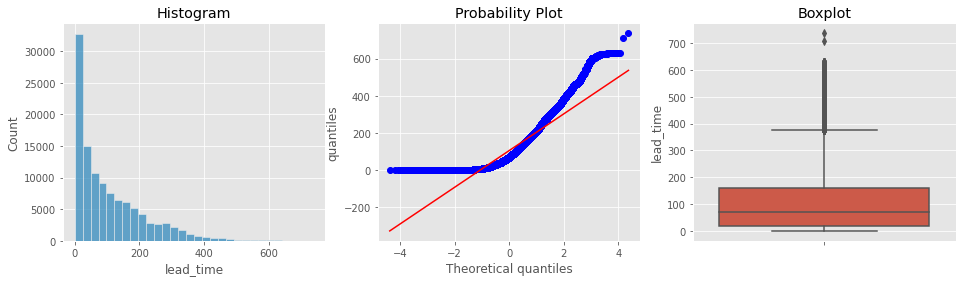

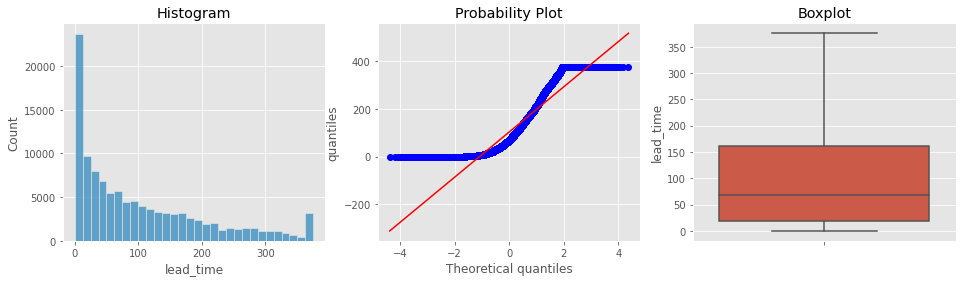

In [175]:
diagnostic_plots(df_train, numerical[0])
diagnostic_plots(df_train_t, numerical[0])

## Feature scaling for linear model